# Importing Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Loading and Processing

In [3]:
df=pd.read_csv("heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
print("Information about the data:")
df.info()

Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df.shape

(303, 14)

In [20]:
#distribution of the target variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1--> Defective Heart <br>
0--> Healthy Heart

# Finding Correlation to extract features

<AxesSubplot: >

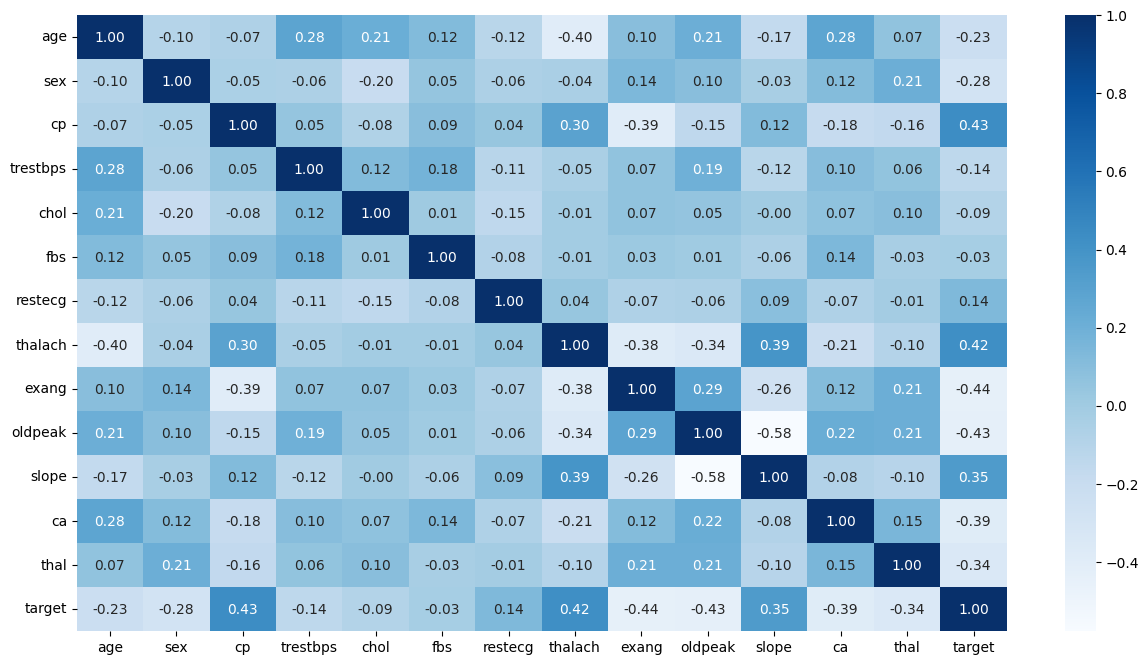

In [51]:
plt.figure(figsize=(15,8))

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap='Blues',annot=True,fmt=".2f")

our target is moderately positive correlated with 'cp, thalach and slope' and moderately negative correlated with 'exang, oldpeak, ca and thal'

# Splitting the dataset into Features and Target


In [25]:
X=df.drop(columns='target',axis=1)
Y=df['target']
print("Features :\n{}\nTarget :\n{}".format(X,Y))

Features :
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2      

# Splitting the dataset into training data and test data

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(f"Shape of original data: {X.shape}\nShape of training data: {X_train.shape}\nShape of test data: {X_test.shape}")

Shape of original data: (303, 13)
Shape of training data: (242, 13)
Shape of test data: (61, 13)


# Model Training

In [27]:
#Logistic Regression
model=LogisticRegression()

In [28]:
#training the model with training data
model.fit(X_train,Y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [29]:
#accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)


In [30]:
#accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [31]:
print(f"Accuracy on\nTraining Data: {training_data_accuracy}\nTest Data: {test_data_accuracy}")

Accuracy on
Training Data: 0.8512396694214877
Test Data: 0.819672131147541


here if the difference on these accuracy score was high, then it would suggest that our model is poor. If the training data accuracy was very high, then it would suggest for over sampling and if the test data accuracy so very low, it would suggests under sampling.<br>Since the difference is not huge, model is quite good

# Building a predictive system


In [60]:
print(f"Requirement to predict the heart disease are:\n{list(X.columns)}")
input_data=(62,0,0,140,268,0,0,160,0,3.6,0,2,2)
# print(type(input_data))

#change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
# print(input_data_as_numpy_array.shape)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
# print(input_data_reshaped.shape)

prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("The person have healthy heart")
else:
    print("The person has heart disease")

Requirement to predict the heart disease are:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
[0]
The person have healthy heart


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Saving the trained model into a pickle file

In [64]:
import pickle

In [65]:
pickle.dump(model,open('logistic_model.pkl','wb'))